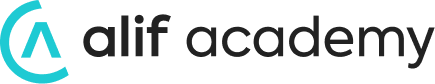

# HW 3.1

This exercise is **not graded**, but I encourage you to pass it in order to receive your project assignments

### Plain Logit Model on Simulated Data

Don't mix this up with the logistic regression

You cand find its mathematical formulation [here](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://eml.berkeley.edu/choice2/ch3.pdf)

Basic components of logit models: 

- utility function
- choice probabilities

I suggest you to code up probabilities of a simple Logit Model. Don't pay attention to functions and other parts of a syntax that may seem new for now.

In [74]:
import numpy as np
import pandas as pd
from itertools import product

In [75]:
np.random.seed(100)
synt_consumers = {'postcodeid':[i for i in range(100)], 
         'income':abs(np.random.normal(80000, 20000, 100)), 
         'population':np.random.uniform(4000, 7000 ,100),
         'vehicle': np.random.randint(2,size = 100),
         'flats':np.random.uniform(10, 70, 100)}
synt_stores = {'shopid':list(range(10)), 
           'size': abs(np.random.normal(500,200, 10)), 
           'smth': np.random.randint(1, 4, 10), # какие-то другие характеристики магазинов
           'smth2': np.random.randint(5, 9, 10)}

In [76]:
consumers_df, shops_df = pd.DataFrame(synt_consumers).astype(int), pd.DataFrame(synt_stores).astype(int)

In [77]:
consumers, shops = consumers_df['postcodeid'], shops_df['shopid']

In [78]:
cross_combinations = pd.DataFrame(tuple(product(consumers, shops)), columns=['postcodeid', 'shopid'])

In [79]:
cross_demographics = consumers_df.merge(
    cross_combinations, 
    left_on='postcodeid',
    right_on='postcodeid',
    how='left'
)

In [80]:
merged_conshops = cross_demographics.merge(
    shops_df, 
    left_on='shopid',
    right_on='shopid',
    how='left'
)

In [81]:
merged_conshops['km'] = np.random.uniform(2, 15, 1000) 

In [82]:
merged_conshops.head()

,postcodeid,income,population,vehicle,flats,shopid,size,smth,smth2,km
0,0,45004,5208,0,23,0,382,2,8,7.511833
1,0,45004,5208,0,23,1,337,2,7,3.712100
2,0,45004,5208,0,23,2,464,3,5,11.674034
3,0,45004,5208,0,23,3,601,1,5,14.261164
4,0,45004,5208,0,23,4,446,1,5,4.149111


In [83]:
merged_conshops['dist*vehicle'] = merged_conshops['km'] * merged_conshops['vehicle']
merged_conshops['log(income)'] = np.log(merged_conshops['income'])
merged_conshops['dist*log(inc)'] = merged_conshops['km'] * merged_conshops['log(income)']
merged_conshops['log(size)'] = np.log(merged_conshops['size'])
merged_conshops['log(size)*log(inc)'] = merged_conshops['log(size)'] * merged_conshops['log(income)']

In [84]:
merged_conshops.head(10)

,postcodeid,income,population,vehicle,flats,shopid,size,smth,smth2,km,dist*vehicle,log(income),dist*log(inc),log(size),log(size)*log(inc)
0,0,45004,5208,0,23,0,382,2,8,7.511833,0.0,10.714507,80.485583,5.945421,63.702249
1,0,45004,5208,0,23,1,337,2,7,3.712100,0.0,10.714507,39.773319,5.820083,62.359317
2,0,45004,5208,0,23,2,464,3,5,11.674034,0.0,10.714507,125.081512,6.139885,65.785834
3,0,45004,5208,0,23,3,601,1,5,14.261164,0.0,10.714507,152.801335,6.398595,68.557788
4,0,45004,5208,0,23,4,446,1,5,4.149111,0.0,10.714507,44.455673,6.100319,65.361908
5,0,45004,5208,0,23,5,328,1,7,7.570291,0.0,10.714507,81.111936,5.793014,62.069283
6,0,45004,5208,0,23,6,811,2,6,14.074904,0.0,10.714507,150.805652,6.698268,71.768638
7,0,45004,5208,0,23,7,281,2,8,11.541544,0.0,10.714507,123.661953,5.638355,60.412189
8,0,45004,5208,0,23,8,651,1,5,5.936013,0.0,10.714507,63.601446,6.478510,69.414035
9,0,45004,5208,0,23,9,260,1,8,8.952892,0.0,10.714507,95.925823,5.560682,59.579960


In [85]:
def util(data, params):
    '''
    Calculates each agents utility from his/her set of alternatives
    data: dataframe (data for estimation)
    params: full array of updating parameters 
    '''
    utilities = data.iloc[:, 9:].values.dot(params) #first 4 columns are 'shoptype', 'postcode', 'INDEX', 'shopid' 
    data = data.copy() #shitty move
    data.loc[:, 'utility'] = utilities
    
    # Outside optionn credentials
    postcodes0 = list(set(data['postcodeid'].astype(int)))
    utilities0 = [0] * len(postcodes0)
    outsideData = pd.DataFrame({'postcodeid': postcodes0, 'utility': utilities0})
    
    dataWithUtilities = (pd.concat([data, outsideData], sort=False)
              .sort_values(by='postcodeid')
              .reset_index()
              .fillna(0)
            ) #data with all necessaary utilities

    return dataWithUtilities

In [86]:
# initialize the parameters
params = [i for i in range(6)]

In [87]:
dataUtil = util(merged_conshops, params)

In [88]:
def data_revenue(data, params):
    '''
    Calculates all of the revenue credentials and values
    data: estimation data
    params: full array of updating params
    Output: utilData and revenue_array for calculations in next steps
    '''
    # Initialize empty sets
    utilities_dict = @@@
    incomes_dict = @@@
    households_dict = @@@

    # Iterate over the rows of the dataframe 
    for index, row in data.iterrows():
        # Get the consumer ID and product ID
        consumer_id = row['postcodeid']
        product_id = row['shopid']
        utility = row['utility']
        income = row['income']
        household = row['flats']

        # Check if the consumer ID is already in the dictionary
        if (consumer_id in @@@) or (consumer_id in @@@) or (consumer_id in @@@):
            # If the consumer ID is already in the dictionary, append the utility to the corresponding array
            utilities_dict[@@@].append(@@@)
            incomes_dict[@@@].append(@@@)
            households_dict[@@@].append(@@@)
        else:
            # If the consumer ID is not in the dictionary, create a new array with the utility and add it to the dictionary
            utilities_dict[@@@] = [utility]
            incomes_dict[@@@] = [income]
            households_dict[@@@] = [household]

    # Apply the probability function to the lists of utilities for each consumer
    probabilities_dict = {}
    revenues_dict = {}
    for consumer_id in utilities_dict:
        #calculate the probabilities - let's try to normalize them a bit differently than just demaxing
        utilities = (utilities_dict[consumer_id] - np.min(utilities_dict[consumer_id])) / (np.max(utilities_dict[consumer_id]) - np.min(utilities_dict[consumer_id])) #utilities_dict[consumer_id] - np.max(utilities_dict[consumer_id])
        utilities_ccp = np.exp(utilities) / (np.sum(np.exp(utilities)) + 1e-3)
        probabilities_dict[consumer_id] = utilities_ccp
        #calculate the revenuews
        revenue = np.array(params[-1]) * incomes_dict[consumer_id] * households_dict[consumer_id] * probabilities_dict[consumer_id]
        revenues_dict[consumer_id] = revenue
    revenues_array = np.concatenate(list(revenues_dict.values()))

    return data, revenues_array

In [89]:
dataUtil, revenue_array = data_revenue(dataUtil, params)